In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from keras.layers import Dense, Embedding, BatchNormalization, Input
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  

In [7]:
data = pd.read_csv('Data_v3.csv')

FileNotFoundError: File b'Data_v3.csv' does not exist

In [3]:
#data = data.drop(['Unnamed: 18'],axis = 1)
#data = data.drop(['Unnamed: 17'],axis = 1)
data = data.drop(['Model Age'],axis = 1)
data = data.drop(['S. No.'],axis = 1)
data = data.drop(['Offer Number'],axis = 1)
data

,Customer Id,Sex,Age,Profile,Store,Product Id,Product Type,Model ID,Product Model,Price,Country,Area,Month,Year
0,10001,m,25.0,J,S,1,Laptop,11,Inspiron 15 3000,"34,089.00",1,1,December,2013
1,10002,f,20.0,S,O,1,Laptop,14,Precision 5520,"2,00,000.00",1,1,July,2013
2,10003,m,34.0,J,O,1,Laptop,13,XPS 9370,"98,990.00",1,2,December,2013
3,10004,f,18.0,S,S,3,Gaming,31,Alienware 15,"1,37,890.00",2,4,July,2013
4,10005,f,19.0,S,O,1,Laptop,11,Inspiron 15 3000,"34,089.00",1,3,August,2013
5,10006,f,19.0,S,O,1,Laptop,11,Inspiron 15 3000,"34,089.00",3,6,May,2013
6,10007,m,18.0,S,O,3,Gaming,31,Alienware 15,"1,37,890.00",3,6,July,2013
7,10008,m,20.0,B,S,4,Server,42,PowerVault RD1000,"74,130.00",1,1,August,2013
8,10009,f,28.0,B,O,4,Server,41,PowerEdge R230,"82,900.00",3,7,December,2013
9,10010,m,29.0,J,O,1,Laptop,11,Inspiron 15 3000,"34,089.00",2,4,December,2013


In [90]:
data.Month.unique()

array(['December', 'July', 'August', 'May', 'April', 'October',
       'November', 'March', 'June', 'January', 'September', 'February'],
      dtype=object)

In [91]:
i = 0
time = []
q1 = 0
q2 = 0
q3 = 0
q4 = 0
for y in range(2013,2019):
    for index,row in data.iterrows():
        if row['Year'] == y:
            if row['Month'] == 'January' or row['Month'] == 'February' or row['Month'] == 'March':
                time.append(i+1)
                q1 = q1 + 1
            elif row['Month'] == 'April' or row['Month'] == 'May' or row['Month'] == 'June':
                time.append(i+2)
                q2 = q2 + 1
            elif row['Month'] == 'July' or row['Month'] == 'August' or row['Month'] == 'September' :
                time.append(i+3)
                q3 = q3 + 1
            elif row['Month'] == 'October' or row['Month'] == 'November' or row['Month'] == 'December':
                time.append(i+4)
                q4 
    i=i+4
            
        

In [92]:
data['time'] = time
#data = data.sort_values(by=['time'])

In [93]:
i = 0
mon = []
for index,row in data.iterrows():
    if row['Month'] == 'January':
        mon.append(((row['Year']-2013)*12)+1)
    elif row['Month'] == 'February':
        mon.append(((row['Year']-2013)*12)+2)
    elif row['Month'] == 'March':
        mon.append(((row['Year']-2013)*12)+3)
    elif row['Month'] == 'April':
        mon.append(((row['Year']-2013)*12)+4)
    elif row['Month'] == 'May':
        mon.append(((row['Year']-2013)*12)+5)
    elif row['Month'] == 'June':
        mon.append(((row['Year']-2013)*12)+6)
    elif row['Month'] == 'July':
        mon.append(((row['Year']-2013)*12)+7)
    elif row['Month'] == 'August':
        mon.append(((row['Year']-2013)*12)+8)
    elif row['Month'] == 'September':
        mon.append(((row['Year']-2013)*12)+9)
    elif row['Month'] == 'October':
        mon.append(((row['Year']-2013)*12)+10)
    elif row['Month'] == 'November':
        mon.append(((row['Year']-2013)*12)+11)
    elif row['Month'] == 'December':
        mon.append(((row['Year']-2013)*12)+12) 
data['monthframe'] = mon

In [94]:
#data = data.sort_values(by=['monthframe'])
print(data.iloc[700:750,12:17])
data.corr()

         Month  Year  time  monthframe
700  September  2017    19          57
701  September  2017    19          57
702       July  2017    19          55
703     August  2017    19          56
704     August  2017    19          56
705  September  2017    19          57
706  September  2017    20          57
707       July  2018    20          67
708     August  2018    20          68
709     August  2018    19          68
710  September  2018    19          69
711  September  2018    19          69
712  September  2016    19          45
713  September  2016    19          45
714       July  2016    19          43
715     August  2016    19          44
716     August  2016    19          44
717  September  2016    19          45
718      April  2016    19          40
719        May  2016    17          41
720       June  2016    18          42
721      April  2016    20          40
722   November  2015    19          35
723  September  2015    20          33
724   November  2015    2

,Customer Id,Age,Product Id,Model ID,Country,Area,Year,time,monthframe
Customer Id,1.000000,0.067007,0.029373,0.092920,-0.008052,0.008297,0.305261,0.771616,0.306385
Age,0.067007,1.000000,0.173439,0.200924,0.069066,0.107920,0.095065,0.061444,0.094978
Product Id,0.029373,0.173439,1.000000,0.504665,0.367252,0.358251,0.004386,-0.002578,-0.059061
Model ID,0.092920,0.200924,0.504665,1.000000,0.182072,0.181205,0.117324,0.107473,0.086342
Country,-0.008052,0.069066,0.367252,0.182072,1.000000,0.901565,0.002906,-0.011436,-0.038278
Area,0.008297,0.107920,0.358251,0.181205,0.901565,1.000000,-0.003218,-0.022598,-0.037812
Year,0.305261,0.095065,0.004386,0.117324,0.002906,-0.003218,1.000000,0.583878,0.989713
time,0.771616,0.061444,-0.002578,0.107473,-0.011436,-0.022598,0.583878,1.000000,0.566576
monthframe,0.306385,0.094978,-0.059061,0.086342,-0.038278,-0.037812,0.989713,0.566576,1.000000


In [95]:
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame:
            i = i + 1
    quant.append(i)
print(timeframe)
print(quant)
print(sum(quant))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[5, 27, 41, 57, 2, 23, 51, 59, 5, 32, 50, 60, 10, 43, 50, 67, 15, 51, 59, 68, 20, 50, 58, 67]
970


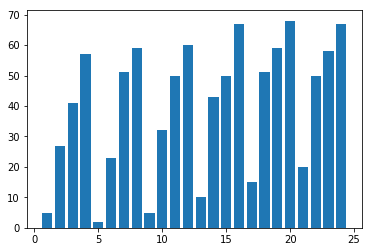

In [96]:
plt.bar(timeframe,quant)
plt.show()

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], [2, 1, 2, 10, 11, 6, 19, 18, 4, 20, 12, 25, 2, 0, 0, 12, 9, 2, 23, 14, 14, 29, 21, 9, 3, 1, 1, 12, 16, 4, 18, 16, 16, 20, 23, 17, 5, 2, 3, 14, 15, 14, 17, 17, 16, 28, 20, 19, 7, 5, 3, 18, 19, 14, 11, 19, 29, 24, 23, 21, 10, 4, 6, 14, 23, 13, 14, 19, 25, 26, 26, 15])
970


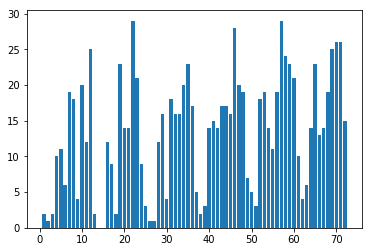

In [97]:
timeframe = list(range(1,73))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['monthframe'] == frame:
            i = i + 1
    quant.append(i)

print((timeframe,quant))
print(sum(quant))
plt.bar(timeframe,quant)
plt.show()

In [98]:
dec = []
count = 0 
p=0
month = 0
for i in range(len(timeframe)):
    if (timeframe[i]-month) % 12 == 0:
        #dec.append(math.pow(((i+1)/12),2)*quant[i])
        if timeframe[i]<=72:
            count = count + math.pow(((i+1)/12),p)
            dec.append(math.pow(((i+1)/12),p)*quant[i])
print(dec)
vupdate = math.ceil((sum(dec))/count)
#print(vupdate)   #5,15,55
quant[71] = vupdate
print(quant[71])

[25.0, 9.0, 17.0, 19.0, 21.0, 15.0]
18


In [99]:
scaler = MinMaxScaler()
quant = np.asarray(quant).reshape(-1,1)
quant = scaler.fit_transform(quant)
print(quant)

[[0.06896552]
 [0.03448276]
 [0.06896552]
 [0.34482759]
 [0.37931034]
 [0.20689655]
 [0.65517241]
 [0.62068966]
 [0.13793103]
 [0.68965517]
 [0.4137931 ]
 [0.86206897]
 [0.06896552]
 [0.        ]
 [0.        ]
 [0.4137931 ]
 [0.31034483]
 [0.06896552]
 [0.79310345]
 [0.48275862]
 [0.48275862]
 [1.        ]
 [0.72413793]
 [0.31034483]
 [0.10344828]
 [0.03448276]
 [0.03448276]
 [0.4137931 ]
 [0.55172414]
 [0.13793103]
 [0.62068966]
 [0.55172414]
 [0.55172414]
 [0.68965517]
 [0.79310345]
 [0.5862069 ]
 [0.17241379]
 [0.06896552]
 [0.10344828]
 [0.48275862]
 [0.51724138]
 [0.48275862]
 [0.5862069 ]
 [0.5862069 ]
 [0.55172414]
 [0.96551724]
 [0.68965517]
 [0.65517241]
 [0.24137931]
 [0.17241379]
 [0.10344828]
 [0.62068966]
 [0.65517241]
 [0.48275862]
 [0.37931034]
 [0.65517241]
 [1.        ]
 [0.82758621]
 [0.79310345]
 [0.72413793]
 [0.34482759]
 [0.13793103]
 [0.20689655]
 [0.48275862]
 [0.79310345]
 [0.44827586]
 [0.48275862]
 [0.65517241]
 [0.86206897]
 [0.89655172]
 [0.89655172]
 [0.62

/Users/rishabhrustogi/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [100]:
hist = 3
qdata = []
target = []
for i in range(hist,len(quant)):
    qdata.append(quant[i-hist:i])
    target.append(quant[i])
qdata = np.asarray(qdata)#.reshape(69,hist)
target = np.asarray(target).reshape(-1,1)
print(qdata)
print(target)
print(qdata.shape,target.shape)
print(qdata.shape)

[[[0.06896552]
  [0.03448276]
  [0.06896552]]

 [[0.03448276]
  [0.06896552]
  [0.34482759]]

 [[0.06896552]
  [0.34482759]
  [0.37931034]]

 [[0.34482759]
  [0.37931034]
  [0.20689655]]

 [[0.37931034]
  [0.20689655]
  [0.65517241]]

 [[0.20689655]
  [0.65517241]
  [0.62068966]]

 [[0.65517241]
  [0.62068966]
  [0.13793103]]

 [[0.62068966]
  [0.13793103]
  [0.68965517]]

 [[0.13793103]
  [0.68965517]
  [0.4137931 ]]

 [[0.68965517]
  [0.4137931 ]
  [0.86206897]]

 [[0.4137931 ]
  [0.86206897]
  [0.06896552]]

 [[0.86206897]
  [0.06896552]
  [0.        ]]

 [[0.06896552]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.4137931 ]]

 [[0.        ]
  [0.4137931 ]
  [0.31034483]]

 [[0.4137931 ]
  [0.31034483]
  [0.06896552]]

 [[0.31034483]
  [0.06896552]
  [0.79310345]]

 [[0.06896552]
  [0.79310345]
  [0.48275862]]

 [[0.79310345]
  [0.48275862]
  [0.48275862]]

 [[0.48275862]
  [0.48275862]
  [1.        ]]

 [[0.48275862]
  [1.        ]
  [0.72413793]]

 [[1.        

In [101]:

model = Sequential()
model.add(LSTM(input_shape=(hist, qdata.shape[2]),output_dim=hist,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 256, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 128, return_sequences = False))
model.add(Dense(1, activation='sigmoid'))

model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
callbacks = [EarlyStopping(monitor='val_loss', patience=4),ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=1, min_lr=0.0001)]
model.fit(qdata, target, epochs=150, batch_size=2, validation_split=0.072,callbacks=callbacks)


/Users/rishabhrustogi/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(3, 1), units=3, return_sequences=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 64 samples, validate on 5 samples
Epoch 1/150
64/64 [==============================] - 5s 77ms/step - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.1143 - val_mean_squared_error: 0.1143
Epoch 2/150
64/64 [==============================] - 1s 17ms/step - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 3/150
64/64 [==============================] - 1s 19ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 4/150
64/64 [==============================] - 1s 17ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1160 - val_mean_squared_error: 0.1160
Epoch 5/150
64/64 [==============================] - 1s 18ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1163 - val_mean_squared_error: 0.1163


In [104]:
pred_data = np.asarray(quant[72-hist:72]).reshape(1,hist,1)
#print(pred_data.shape)
#print(pred_data)
pred = model.predict(pred_data)
#print(pred)
pred = scaler.inverse_transform(pred)
print(pred)

[[13.566045]]


335


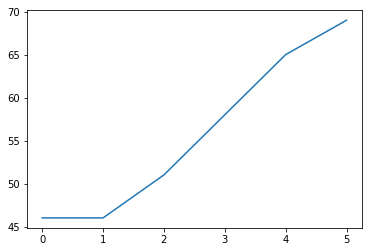

In [56]:
years = list(range(0,6))
c1_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Country']==1 and row['Year']==yearly:
            count = count+1
    c1_year_quant.append(count)
    count=0
print(sum(c1_year_quant))
plt.plot(years,c1_year_quant)
plt.show()
c1_year_quant = np.asarray(c1_year_quant).reshape(-1,1)
years = np.asarray(years).reshape(-1,1)

In [57]:
Lmodel = LinearRegression()  
Lmodel.fit(years, c1_year_quant)
Lmodel.score(years,c1_year_quant)
pred = Lmodel.predict(np.array([[6]]))
c1_year_quant = np.append(c1_year_quant,[[pred]])
print(pred)
print(c1_year_quant)

[[73.73333333]]
[46.         46.         51.         58.         65.         69.
 73.73333333]


287


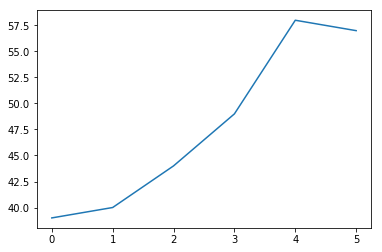

In [58]:
c2_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Country']==2 and row['Year']==yearly:
            count = count+1
    c2_year_quant.append(count)
    count=0
print(sum(c2_year_quant))
plt.plot(years,c2_year_quant)
plt.show()

In [59]:
Lmodel = LinearRegression()  
Lmodel.fit(years, c2_year_quant)
Lmodel.score(years,c2_year_quant)
pred = Lmodel.predict(np.array([[6]]))
c2_year_quant = np.append(c2_year_quant,[[pred]])
print(pred)
print(c2_year_quant)

[62.73333333]
[39.         40.         44.         49.         58.         57.
 62.73333333]


348


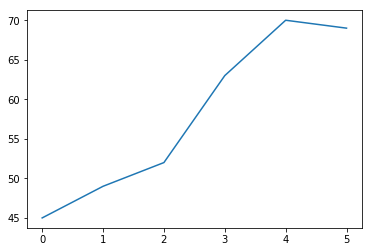

In [60]:
c3_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Country']==3 and row['Year']==yearly:
            count = count+1
    c3_year_quant.append(count)
    count=0
print(sum(c3_year_quant))
plt.plot(years,c3_year_quant)
plt.show()

In [61]:
Lmodel = LinearRegression()  
Lmodel.fit(years, c3_year_quant)
Lmodel.score(years,c3_year_quant)
pred = Lmodel.predict(np.array([[6]]))
c3_year_quant = np.append(c3_year_quant,[[pred]])
print(pred)
print(c3_year_quant)

[77.4]
[45.  49.  52.  63.  70.  69.  77.4]


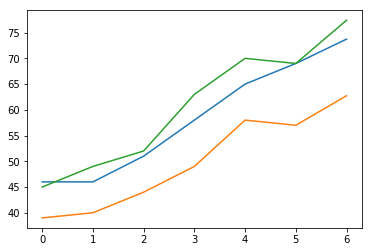

In [62]:
years = np.append(years,[[6]])
plt.plot(years,c1_year_quant)
plt.plot(years,c2_year_quant)
plt.plot(years,c3_year_quant)
plt.show()

118


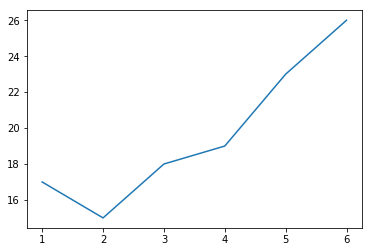

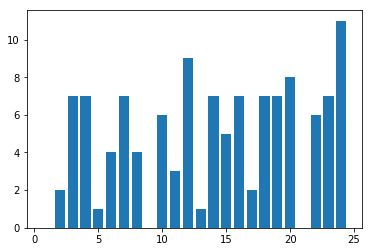

In [16]:
area = 1
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

113


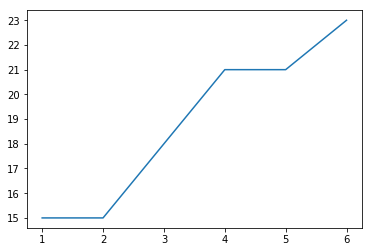

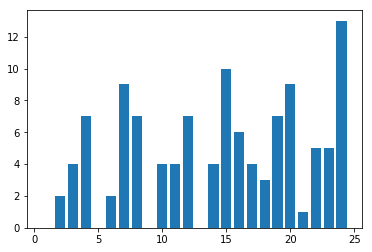

In [17]:
area = 2
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

104


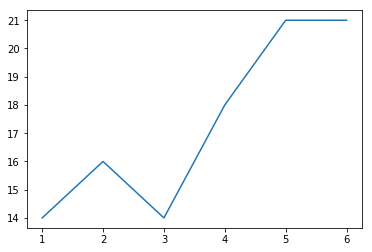

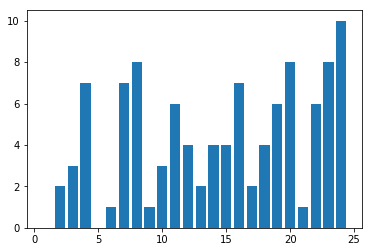

In [43]:
area = 3
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

142


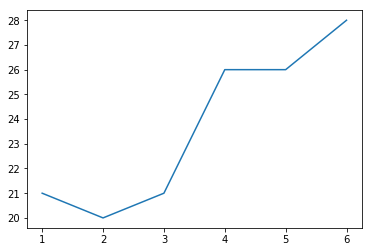

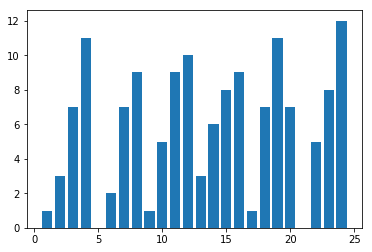

In [44]:
area = 4
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

144


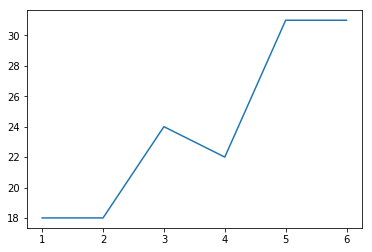

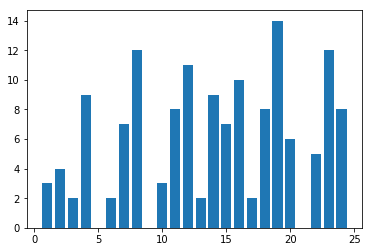

In [45]:
area = 5
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

110


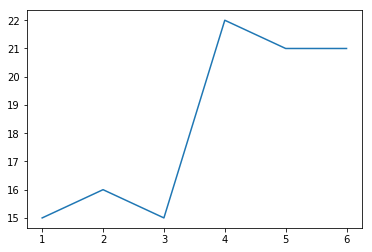

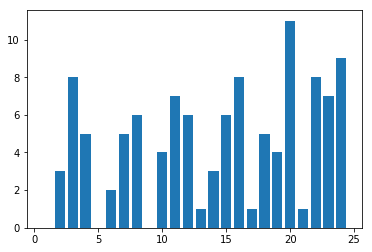

In [46]:
area = 6
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

116


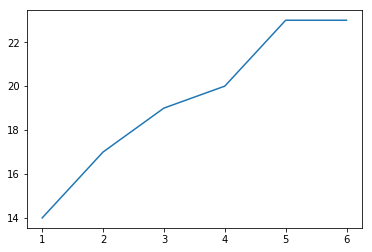

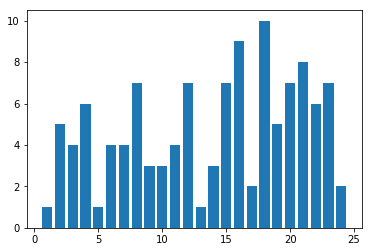

In [47]:
area = 7
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

123


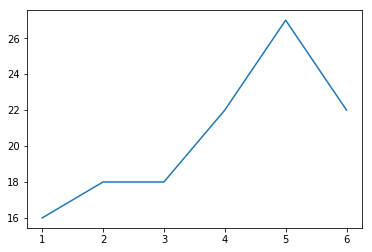

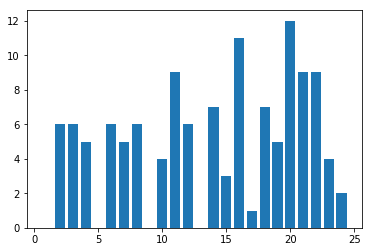

In [48]:
area = 8
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(years,a_year_quant)
plt.show()
plt.bar(timeframe,quant)
plt.show()

In [49]:
data['Product Type'].unique()

array(['Laptop', 'Desktop', 'Server', 'Gaming'], dtype=object)

[33 16  0 33]


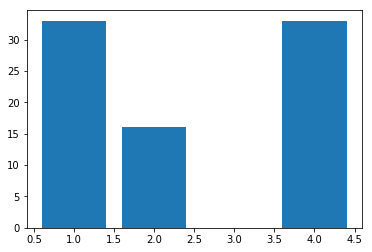

In [50]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Age']>12 and row['Age']<=18:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()
        

[166   9   5  40]


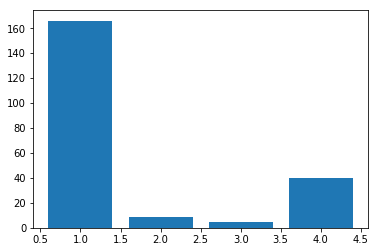

In [51]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Age']>18 and row['Age']<=24:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()
        

[63  9 15  8]


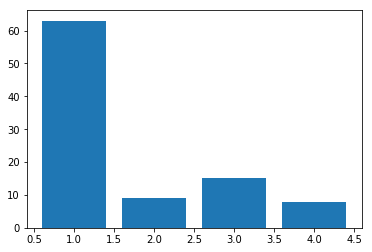

In [52]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Age']>24 and row['Age']<=30:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()
        

[160  92 129  20]


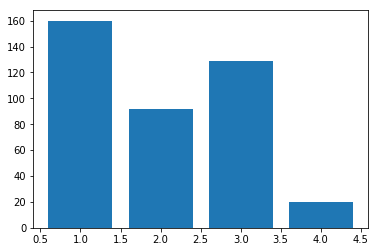

In [53]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Age']>30 and row['Age']<60:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()
        

[61 63 32  1]


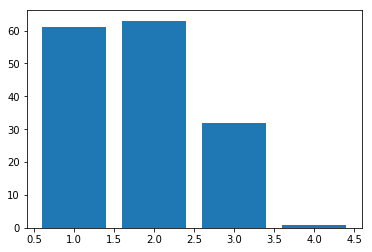

In [54]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Age']>60:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()
        

In [55]:
data['Profile'].unique()

array(['B', 'N', 'J', 'S', 'K'], dtype=object)

[250  50   3  36]


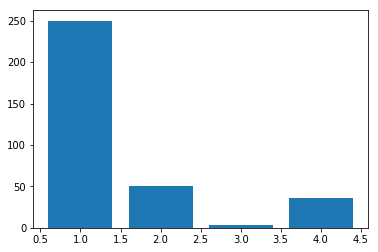

In [56]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Profile']=='J' or row['Profile']=='K':
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()
        

[159  21   1  62]


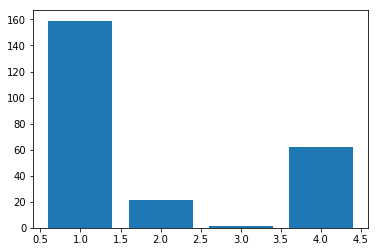

In [57]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Profile']=='S':
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()

[  8  60 180   3]


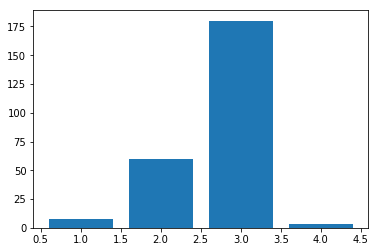

In [58]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Profile']=='B':
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()

[58 53  2  1]


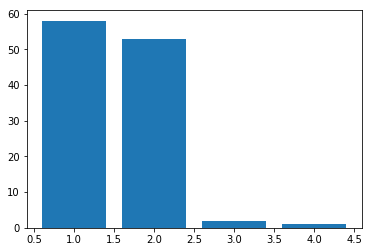

In [59]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Profile']=='N' and row['Age']>60:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()

[9 6 0 0]


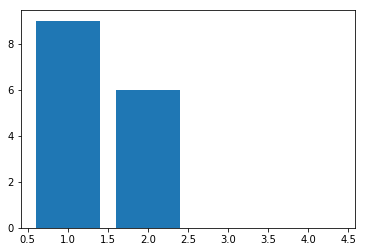

In [60]:
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Profile']=='N' and row['Age']<60:
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()

In [61]:
mat3d = []
for yearly in range(2013,2019): 
    L = 0
    D = 0
    S = 0
    G = 0
    for index, row in data.iterrows():
        if row['Country']==1 and row['Year']==yearly:
            if row['Product Type']=='Laptop':
                L=L+1
            elif row['Product Type']=='Desktop':
                D=D+1
            elif row['Product Type']=='Server':
                S=S+1
            elif row['Product Type']=='Gaming':
                G=G+1
    mat3d.append([L,D,S,G])
tot = []
for i in mat3d:
    quant = 0
    for j in i:
        quant = quant + j
    tot.append(quant)
print(mat3d)
print(tot)

[[33, 7, 2, 4], [36, 7, 1, 2], [38, 5, 3, 5], [38, 13, 4, 3], [44, 13, 5, 3], [46, 9, 7, 7]]
[46, 46, 51, 58, 65, 69]


In [210]:
for index, row in data.iterrows():
    if row['monthframe']==68 :
        print(row['Product Type'])

Laptop
Gaming
Laptop
Laptop
Gaming
Gaming
Laptop
Laptop
Laptop
Desktop
Laptop
Laptop
Gaming
Laptop
Laptop
Laptop
Laptop
Laptop
Laptop


118


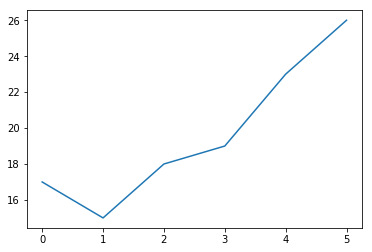

[17  2  2  5]


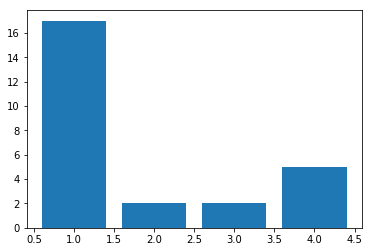

In [75]:
area = 1
timeframe = list(range(1,25))
quant = []
for frame in timeframe:
    i=0
    for index, row in data.iterrows():
        if row['time'] == frame and row['Area'] == area:
            i = i + 1
    quant.append(i)
a_year_quant = []
count=0
for yearly in range(2013,2019):
    for index, row in data.iterrows():
        if row['Area']==area and row['Year']==yearly:
            count = count+1
    a_year_quant.append(count)
    count=0
print(sum(a_year_quant))
plt.plot(a_year_quant)
plt.show()
L = 0
D = 0
S = 0
G = 0
for index, row in data.iterrows():
    if row['Area']==1 and row['Year']==2018 :
        if row['Product Type']=='Laptop':
            L=L+1
        elif row['Product Type']=='Desktop':
            D=D+1
        elif row['Product Type']=='Server':
            S=S+1
        elif row['Product Type']=='Gaming':
            G=G+1
            
disp = np.asarray([L,D,S,G])
print(disp)
plt.bar([1,2,3,4],disp)
plt.show()

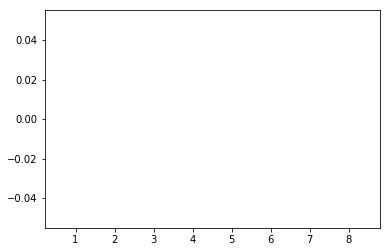

In [86]:
X=111
prediction = []
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
a7=0
a8=0
for index,row in data.iterrows():
    if row['Product Model'] == X and row['Year']>2016 and row['Year']<2019:
        if row['Area']==1:
            a1=a1+1
        if row['Area']==2:
            a2=a2+1
        if row['Area']==3:
            a3=a3+1
        if row['Area']==4:
            a4=a4+1
        if row['Area']==5:
            a5=a5+1
        if row['Area']==6:
            a6=a6+1
        if row['Area']==7:
            a7=a7+1
        if row['Area']==8:
            a8=a8+1
arr = np.asarray([a1,a2,a3,a4,a5,a6,a7,a8])
plt.bar([1,2,3,4,5,6,7,8],arr)
plt.show()